In [10]:
import numpy as np
import matplotlib.pyplot as plt
import random

### Simple Linear Regression

<div style="display: flex;">
    <img src="imgs/SimpleLR.jpg" alt="Simple Linear Regression 1" style="width:400px; margin-right: 10px;"/>
    <img src="imgs/SimpleLR2.jpg" alt="Simple Linear Regression 2" style="width:400px;"/>
</div>


In [11]:
class SimpleLinearRegression:
    def __init__(self):
        # set our model params to None because we will update it below in 'fit' function
        self.slope = None
        self.intercept = None

    def fit(self, X,y):
        mean_x = np.mean(X)
        mean_y = np.mean(y)
        sigma_x = np.sum(X)
        sigma_xy = np.sum(X*y)
        sigma_x2 = np.sum(X*X)

        numerator = sigma_xy - mean_y*sigma_x
        denominator = sigma_x2 - mean_x*sigma_x

        self.slope = numerator/denominator
        self.intercept = mean_y - self.slope*(mean_x)
        # we don't return anything but updated the params which we initialised above in __init__

    def predict(self,x_test):
        y_hat = self.slope*x_test + self.intercept
        return y_hat

    def pred_error(self, y_pred, y_test):
        mse = np.mean((y_test-y_pred)**2)
        return mse





X.shape:  (49,)
y.shape:  (49,)


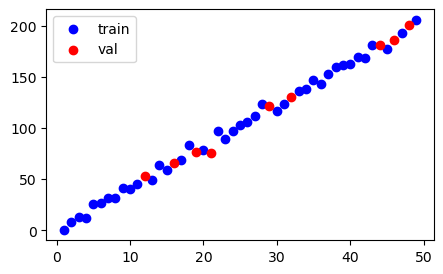

In [12]:
x = np.arange(1,50)
n = x.shape[0]
m = 4
b = 3
noise = np.random.randn(n)*4
y = m*x+b + noise
print('X.shape: ',x.shape)
print('y.shape: ', y.shape)


# Divide dataset into train and val
val_percent = 0.2
all_indices = list(range(n))

val_indices = random.sample(all_indices, int(n*val_percent))
train_indices = list(set(all_indices).difference(set(val_indices)))

X_train, y_train = x[train_indices], y[train_indices]
X_val, y_val = x[val_indices], y[val_indices]


plt.figure(figsize = (5,3))
plt.scatter(X_train,y_train, color ='blue', label = 'train')
plt.scatter(X_val,y_val, color ='red', label = 'val')
plt.legend()
plt.show()

Slope:  4.091347605433152
Intercept:  0.5423546117912821
Test MSE:  18.149529463719407


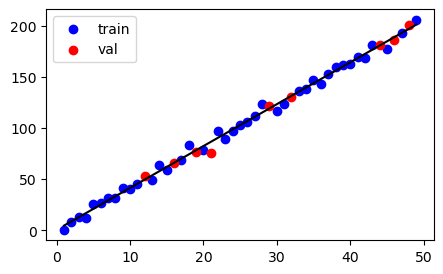

In [13]:
# Initalize model
model = SimpleLinearRegression()
# fit the model
model.fit(X_train,y_train)
# see the params found
print('Slope: ', model.slope)
print('Intercept: ', model.intercept)
# get_preds
y_preds = model.predict(X_val)
# check error
test_error = model.pred_error(y_preds, y_val)
print('Test MSE: ', test_error)

# print line of best fit
xmin = np.min(x); ymin = model.slope * xmin + model.intercept
xmax = np.max(x); ymax = model.slope * xmax + model.intercept

plt.figure(figsize = (5,3))
plt.plot([xmin, xmax], [ymin, ymax], color='black')
plt.scatter(X_train,y_train, color ='blue', label = 'train')
plt.scatter(X_val,y_val, color ='red', label = 'val')
plt.legend()
plt.show()

### Multiple Linear Regression in Closed form

- theta = (X^T X)-1 XTy
- this has x0 = 1

<img src="imgs/LR-closed.jpg" alt="Linear Regression with GD" style="width:400px;"/>


In [14]:
class LinearRegressionClosedForm:
    def __init__(self):
        self.theta = None
    def fit(self,X,y):
        self.theta = np.linalg.pinv(X.T @ X)@X.T@y
        # use pinv instead of inv is X.T X is non-invertible
        # pinv making a HUGE differene in output

    def predict(self,x_test):
        y_hat = x_test@self.theta
        return y_hat

    def pred_error(self, y_pred, y_test):
        mse = np.mean((y_test-y_pred)**2)
        return mse


In [35]:
X1 = np.linspace(start=1,stop=41, num=100); print('X1.shape', X1.shape)
X2 = np.linspace(start=5,stop=45, num=100); print('X2.shape', X2.shape)
# X1 and X2 needs to be of same size

n = X1.shape[0]
m1 = 3
m2 = 4.5
b1 = 4
b2 = 6
noise = np.random.randn()*0

x0 = np.ones_like(X1); print('x0.shape', x0.shape)

# Multiple Linear Regression
X = np.stack([x0, X1, X2], axis=1); print('X.shape', X.shape)
y = m1*X1 + b1 + m2*X2 + b2 + noise; print('y.shape', y.shape)

# # Simple Linear Regression
# X = np.stack([x0, X1], axis=1); print('X.shape', X.shape)
# y = m1*X1 + b1 + noise; print('y.shape', y.shape)

# Divide dataset into train and val
val_percent = 0.2
all_indices = list(range(n))

val_indices = random.sample(all_indices, int(n*val_percent))
train_indices = list(set(all_indices).difference(set(val_indices)))

X_train, y_train = X[train_indices], y[train_indices]
X_val, y_val = X[val_indices], y[val_indices]

print(f'X_train.shape: {X_train.shape}, y_train.shape: {y_train.shape} ')
print(f'X_val.shape: {X_val.shape}, y_val.shape: {y_val.shape} ')

X1.shape (100,)
X2.shape (100,)
x0.shape (100,)
X.shape (100, 3)
y.shape (100,)
X_train.shape: (80, 3), y_train.shape: (80,) 
X_val.shape: (20, 3), y_val.shape: (20,) 


In [36]:
# Initalize model
model = LinearRegressionClosedForm()
# fit the model
model.fit(X_train,y_train)
# see the params found
print('theta: ', model.theta)
print('theta.shape: ', model.theta.shape)
# get_preds
y_preds = model.predict(X_val)
for gt,pred in zip(y_val, y_preds):
    print('GT: Pred -> ', gt,'->', pred)

# check error
test_error = model.pred_error(y_preds, y_val)
print('Test MSE: ', test_error)

theta:  [1.44444444 0.86111111 6.63888889]
theta.shape:  (3,)
GT: Pred ->  293.0757575757576 -> 293.07575757576166
GT: Pred ->  262.77272727272725 -> 262.77272727273083
GT: Pred ->  183.9848484848485 -> 183.9848484848508
GT: Pred ->  332.469696969697 -> 332.4696969697017
GT: Pred ->  202.16666666666666 -> 202.16666666666927
GT: Pred ->  205.1969696969697 -> 205.19696969697236
GT: Pred ->  62.77272727272728 -> 62.77272727272764
GT: Pred ->  238.530303030303 -> 238.53030303030624
GT: Pred ->  232.46969696969697 -> 232.46969696970007
GT: Pred ->  168.83333333333334 -> 168.83333333333542
GT: Pred ->  56.71212121212121 -> 56.71212121212149
GT: Pred ->  80.95454545454545 -> 80.95454545454612
GT: Pred ->  326.40909090909093 -> 326.40909090909554
GT: Pred ->  117.31818181818181 -> 117.31818181818306
GT: Pred ->  126.4090909090909 -> 126.4090909090923
GT: Pred ->  180.95454545454547 -> 180.9545454545477
GT: Pred ->  274.8939393939394 -> 274.8939393939431
GT: Pred ->  305.1969696969697 -> 305.19

### Multiple Linear Regression with Gradient Descent

<img src="imgs/LR-GD.jpg" alt="Linear Regression with GD" style="width:500px;"/>


In [37]:
class LinearRegressionGD:
    def __init__(self):
        self.theta = None

    def fit(self, X, y, lr=0.0001, itrs=100):
        # init params
        self.theta = np.random.randn(X.shape[1]) # shape: (X.shape[1],)
        n = y.shape[0]
        for itr in range(itrs):
            y_hat = X@self.theta
            self.theta = self.theta - (lr/n)*(X.T@(y_hat-y)) # Chance of error: lr -> lr/n for averaging across training data

    def predict(self,x_test):
        y_hat = x_test@self.theta
        return y_hat

    def pred_error(self, y_pred, y_test):
        mse = np.mean((y_test-y_pred)**2)
        return mse



In [38]:
# Initalize model
model = LinearRegressionGD()
# fit the model
model.fit(X_train,y_train, lr=0.001, itrs=10000)
# see the params found
print('theta: ', model.theta)
print('theta.shape: ', model.theta.shape)
# get_preds
y_preds = model.predict(X_val)
for gt,pred in zip(y_val, y_preds):
    print('GT: Pred -> ', gt,'->', pred)

# check error
test_error = model.pred_error(y_preds, y_val)
print('Test MSE: ', test_error)

theta:  [1.84810595 0.9620265  6.5379735 ]
theta.shape:  (3,)
GT: Pred ->  293.0757575757576 -> 293.07575759020483
GT: Pred ->  262.77272727272725 -> 262.77272728064537
GT: Pred ->  183.9848484848485 -> 183.98484847579107
GT: Pred ->  332.469696969697 -> 332.469696992632
GT: Pred ->  202.16666666666666 -> 202.16666666152668
GT: Pred ->  205.1969696969697 -> 205.1969696924826
GT: Pred ->  62.77272727272728 -> 62.77272723755353
GT: Pred ->  238.530303030303 -> 238.53030303299795
GT: Pred ->  232.46969696969697 -> 232.46969697108605
GT: Pred ->  168.83333333333334 -> 168.83333332101137
GT: Pred ->  56.71212121212121 -> 56.712121175641656
GT: Pred ->  80.95454545454545 -> 80.95454542328916
GT: Pred ->  326.40909090909093 -> 326.40909093072014
GT: Pred ->  117.31818181818181 -> 117.3181817947604
GT: Pred ->  126.4090909090909 -> 126.40909088762822
GT: Pred ->  180.95454545454547 -> 180.9545454448351
GT: Pred ->  274.8939393939394 -> 274.89393940446917
GT: Pred ->  305.1969696969697 -> 305.1


<a href="https://github.com/mgupta70/literature/blob/main/Linear%20Regression.pdf"> Click here</a> for for intriguing __Q&A__ on Linear Regression :)